## Import Libraries


#### Import Numpy,Pandas,Matplotlib and Seaborn libraries

In [1]:
import numpy as np # Linear algebra library for python
import pandas as pd # data manipulation library for python
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get Data

#### Read the 911 calls excel file into a dataframe

In [2]:
df = pd.read_excel('rev data for test.xlsx')

#### Check the head of the dataframe

In [3]:
df.head()

,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


In [4]:
df.shape

(1514, 4)

In [5]:
df.columns

Index(['Type', 'Latitude', 'Longitude', 'Report Location'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 4 columns):
Type               1514 non-null object
Latitude           1514 non-null float64
Longitude          1514 non-null float64
Report Location    1514 non-null object
dtypes: float64(2), object(2)
memory usage: 47.4+ KB


In [7]:
df.dtypes

Type                object
Latitude           float64
Longitude          float64
Report Location     object
dtype: object

In [8]:
df['Type'].value_counts()

Beaver Accident            508
Latte Spills               416
Marshawn Lynch Sighting    324
Seal Attack                266
Name: Type, dtype: int64

In [9]:
df['Type'].unique()

array(['Beaver Accident', 'Seal Attack', 'Latte Spills',
       'Marshawn Lynch Sighting'], dtype=object)

In [10]:
df['Type'].nunique()

4

### 1. Most common reason for 911 calls
Beaver accident is the most common reason for 911 calls

Count plot show the count of observations in each category using bars

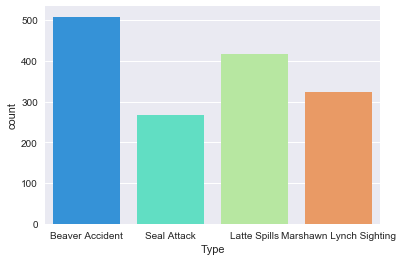

In [11]:
sns.countplot(x='Type',data=df,palette='rainbow')

### 2. Graph of the 911 calls using Latitude and Longitude
Visualization gives the clear idea of the distribution of observations, here we can see some data points are mislabeled.

lmplot to see if the clusters are linearly separable

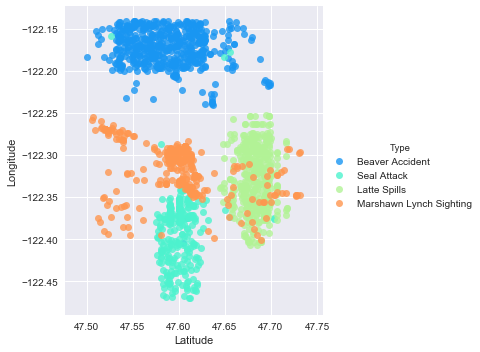

In [12]:
sns.lmplot( x="Latitude", y="Longitude", data=df, fit_reg=False, hue='Type',palette='rainbow')

Pairplot plot pairwise relationships in a dataset, used to quickly explore distributions and ralationships in a dataset.

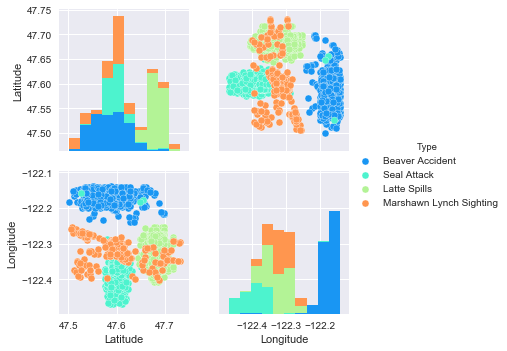

In [13]:
sns.pairplot(df,hue='Type',palette='rainbow')

## Standardize the variable
KNN identifies an object based on its neighbor, so scale of the variable actually matters a lot. Any variable that has large scale have much effect on the distance between observations, so we need to standardize everything to same scale.

#### Import standard scalar from Scikit learn

In [14]:
from sklearn.preprocessing import StandardScaler

#### Create a StandardScalar() object called scaler

In [15]:
scaler = StandardScaler()

#### Fit scaler to the features

In [16]:
scaler.fit(df[['Latitude','Longitude']])

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Use the transform() method to transform the features into scaled verson

In [17]:
scaled_features = scaler.transform(df[['Latitude','Longitude']])

#### Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked

In [18]:
df_scaled = pd.DataFrame(scaled_features,columns=('Latitude','Longitude'))

In [19]:
df_scaled.head()

,Latitude,Longitude
0,1.555332,0.755914
1,1.526430,0.759261
2,1.507162,0.796072
3,1.514869,0.743644
4,1.426235,0.800534


## Train Test Split

#### Use train_test split to split the dataset into train set and test set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,df['Type'],test_size=0.3)

## Using KNN
KNN works with any number of classes and its non-paramertic i.e it makes no assumption about the data distribution. KNN classifier commonly based on the Eculidean distance between a test sample and specified training sample. The main idea of KNN algorithm is whenever there is a new point to predict its k nearest neighbors are chosen from the training data, and KNN is used for statistical estimation and patteren recognition.

#### Import KNeighborsClassifier from Scikit learn

In [22]:
from sklearn.neighbors import KNeighborsClassifier

#### Create KNN model instance with n_neighbors=1

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

#### Fit this KNN model to the training data

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predictions and Evaluations

#### Use the predict methods to predict values using KNN model and X_test

In [25]:
pred = knn.predict(X_test)

#### Create a confusion matrix and classification report

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,pred))

                         precision    recall  f1-score   support

        Beaver Accident       0.97      0.97      0.97       150
           Latte Spills       0.98      0.88      0.93       128
Marshawn Lynch Sighting       0.84      0.98      0.90        92
            Seal Attack       0.93      0.92      0.92        85

            avg / total       0.94      0.94      0.94       455



In [28]:
print(confusion_matrix(y_test,pred))

[[146   0   0   4]
 [  0 112  14   2]
 [  0   2  90   0]
 [  4   0   3  78]]


## Choosing a K value
If k=1 the algorithm pick up lot of noise, if the k value is higher, it create more bias values. So we need to choose correct value for k

#### Create a for loop that trains various knn models with different k values, then keep track of the error_rate for each of these models with a list

In [29]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#### Create a plot using information from the loop

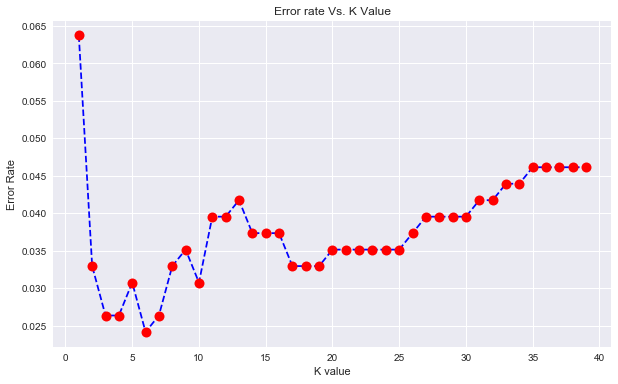

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

## Retrain with new K Value

#### Retrain the model with best k value and calculate classificaton report and confusion matrix

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With K = 10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With K = 10


[[149   0   0   1]
 [  0 128   0   0]
 [  0   8  84   0]
 [  2   1   2  80]]


                         precision    recall  f1-score   support

        Beaver Accident       0.99      0.99      0.99       150
           Latte Spills       0.93      1.00      0.97       128
Marshawn Lynch Sighting       0.98      0.91      0.94        92
            Seal Attack       0.99      0.94      0.96        85

            avg / total       0.97      0.97      0.97       455



## Grid search for multiple models and parameters

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [33]:
#Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [34]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.933881
KNN: 0.951851
TREE: 0.932974
NB: 0.937673
SVM: 0.948059


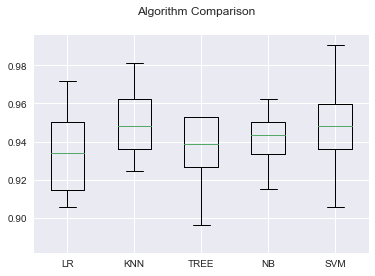

In [35]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Conclusion

Beaver accident is the most common reason for 911 calls in the city of seatlle dataset. While visualizaton i realize some of the 
datapoints are mislabled. If we take off the labels we can still determine which category a 911 call would most likely fall into
using Machine Learning algorithm KNN, KNN works with any number of classes and its non-paramertic i.e it makes no assumption 
about the data distribution. KNN classifier commonly based on the Eculidean distance between a test sample and specified 
training sample. The main idea of KNN algorithm is whenever there is a new point to predict its k nearest neighbors are chosen 
from the training data, and KNN is used for statistical estimation and patteren recognition. 

I used grid search for multiple models and parameters,KNN gives more accuracy compare to other classifiers. 